<a href="https://colab.research.google.com/github/jyoti-kumbhar/Data-Science/blob/main/prac8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Practical No.8
* Aim:K-Means Clustering
1. Apply the K-Means algorithm to group similar data points into clusters.
2. Determine the optimal number of clusters using elbow method or silhouette
analysis.
3. Visualize the clustering results and analyze the cluster characteristics.
* Jyoti Kumbhar T091

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.shape

(200, 5)

In [26]:
# Convert Gender to numerical
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

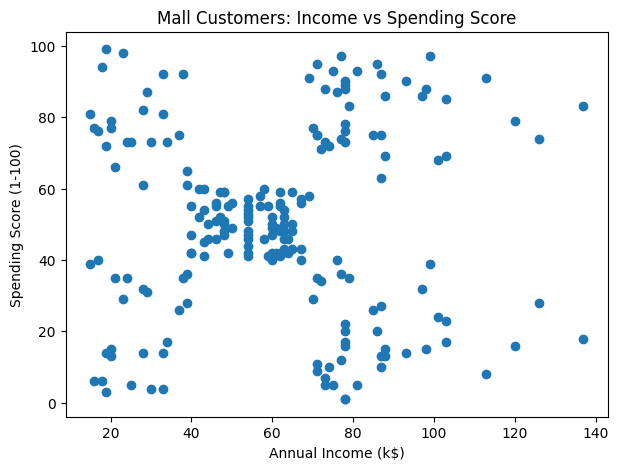

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customers: Income vs Spending Score')
plt.show()

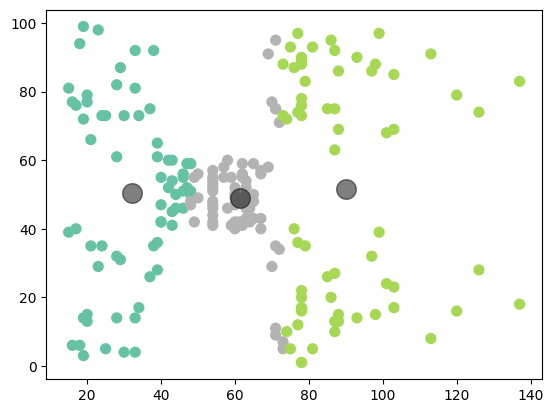

In [36]:
df.dropna()
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)
#Scatter plotting the result
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=y_kmeans, s=50, cmap='Set2')
#centroid
centers = kmeans.cluster_centers_
weight = df.columns.get_loc('Annual Income (k$)')
length = df.columns.get_loc('Spending Score (1-100)')
plt.scatter(centers[:, weight], centers[:, length],
            c='black', s=200, alpha=0.5);

In [29]:
#Elbow method
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
sum = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    sum.append(kmeans.inertia_)

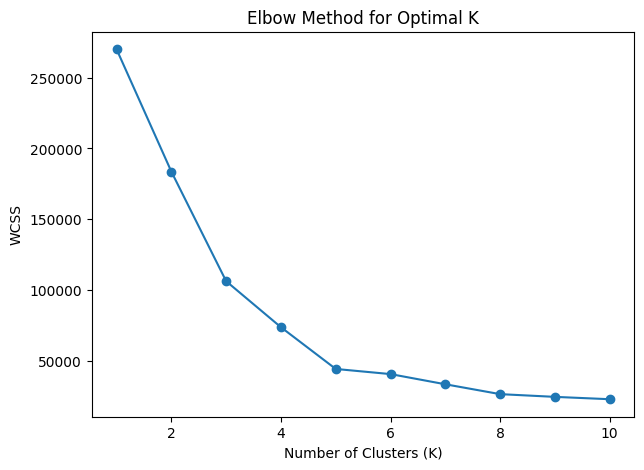

In [30]:
# Plot Elbow Graph
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), sum, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

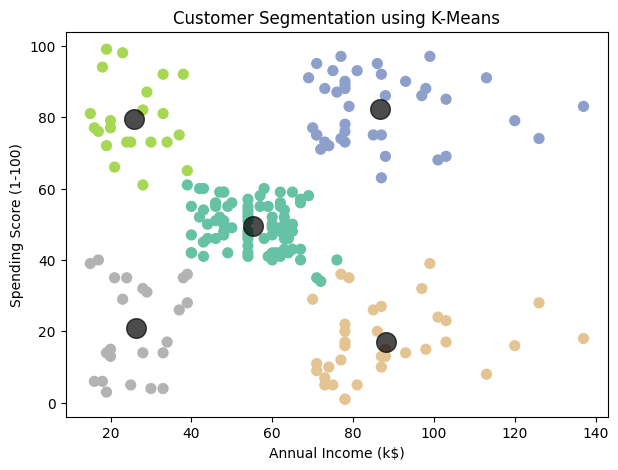

In [35]:
plt.figure(figsize=(7,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='Set2', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            c='black', s=200, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.show()